In [1]:
# Thematic Analysis for Ethiopian Bank Reviews
import sys
sys.path.append('../src')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from thematic_analysis import ThematicAnalyzer
import json
from wordcloud import WordCloud
from collections import Counter
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

print("=== Ethiopian Bank Reviews - Thematic Analysis ===\n")


=== Ethiopian Bank Reviews - Thematic Analysis ===



In [4]:
# Load sentiment analysis results
print("Loading sentiment analysis results...")
sentiment_df = pd.read_csv(r"C:\Users\admin\sentiment-analysis-week2\data\results\sentiment_analysis_detailed.csv")

print(f"✓ Loaded {len(sentiment_df)} analyzed reviews")
print(f"✓ Banks: {', '.join(sentiment_df['bank_name'].unique())}")


Loading sentiment analysis results...
✓ Loaded 700 analyzed reviews
✓ Banks: Amhara Bank, Awash Bank, Commercial Bank of Ethiopia


In [5]:
# Display sample
print("\nSample data for thematic analysis:")
display(sentiment_df[['bank_name', 'rating', 'sentiment_label', 'review_text']].head())

# 1. Initialize Thematic Analyzer
print("\n1. Initializing Thematic Analysis Engine...")
thematic_analyzer = ThematicAnalyzer()



Sample data for thematic analysis:


,bank_name,rating,sentiment_label,review_text
0,Amhara Bank,5,POSITIVE,Very Useful and attractive app !
1,Amhara Bank,5,POSITIVE,Easy to use without need to authorization
2,Amhara Bank,5,POSITIVE,wow in Ethiopia private bank amazing mobile app
3,Amhara Bank,5,POSITIVE,One of best mobile application i have ever use...
4,Amhara Bank,5,POSITIVE,it's nice... go ahade 🫵 👌💪👏👏👏



1. Initializing Thematic Analysis Engine...


In [6]:
# 2. Analyze Themes by Bank
print("\n2. Performing Thematic Analysis by Bank...")

bank_themes = {}
theme_evolution = {}
for bank in sentiment_df['bank_name'].unique():
    print(f"   Analyzing {bank}...")
    bank_df = sentiment_df[sentiment_df['bank_name'] == bank]
    
    # Full bank analysis
    bank_analysis = thematic_analyzer.analyze_bank_themes(bank_df, bank)
    bank_themes[bank] = bank_analysis
    
    # Analyze themes by sentiment
    positive_themes = thematic_analyzer.analyze_bank_themes(
        bank_df[bank_df['sentiment_label'] == 'positive'], 
        f"{bank} - Positive"
    )
    negative_themes = thematic_analyzer.analyze_bank_themes(
        bank_df[bank_df['sentiment_label'] == 'negative'], 
        f"{bank} - Negative"
    )
    
    theme_evolution[bank] = {
        'positive': positive_themes,
        'negative': negative_themes
    }

print("✓ Thematic analysis completed for all banks")


    


2. Performing Thematic Analysis by Bank...
   Analyzing Amhara Bank...


No reviews found for Amhara Bank - Positive
No reviews found for Amhara Bank - Negative


   Analyzing Awash Bank...


No reviews found for Awash Bank - Positive
No reviews found for Awash Bank - Negative


   Analyzing Commercial Bank of Ethiopia...


No reviews found for Commercial Bank of Ethiopia - Positive
No reviews found for Commercial Bank of Ethiopia - Negative


✓ Thematic analysis completed for all banks



3. Visualizing Theme Distribution...


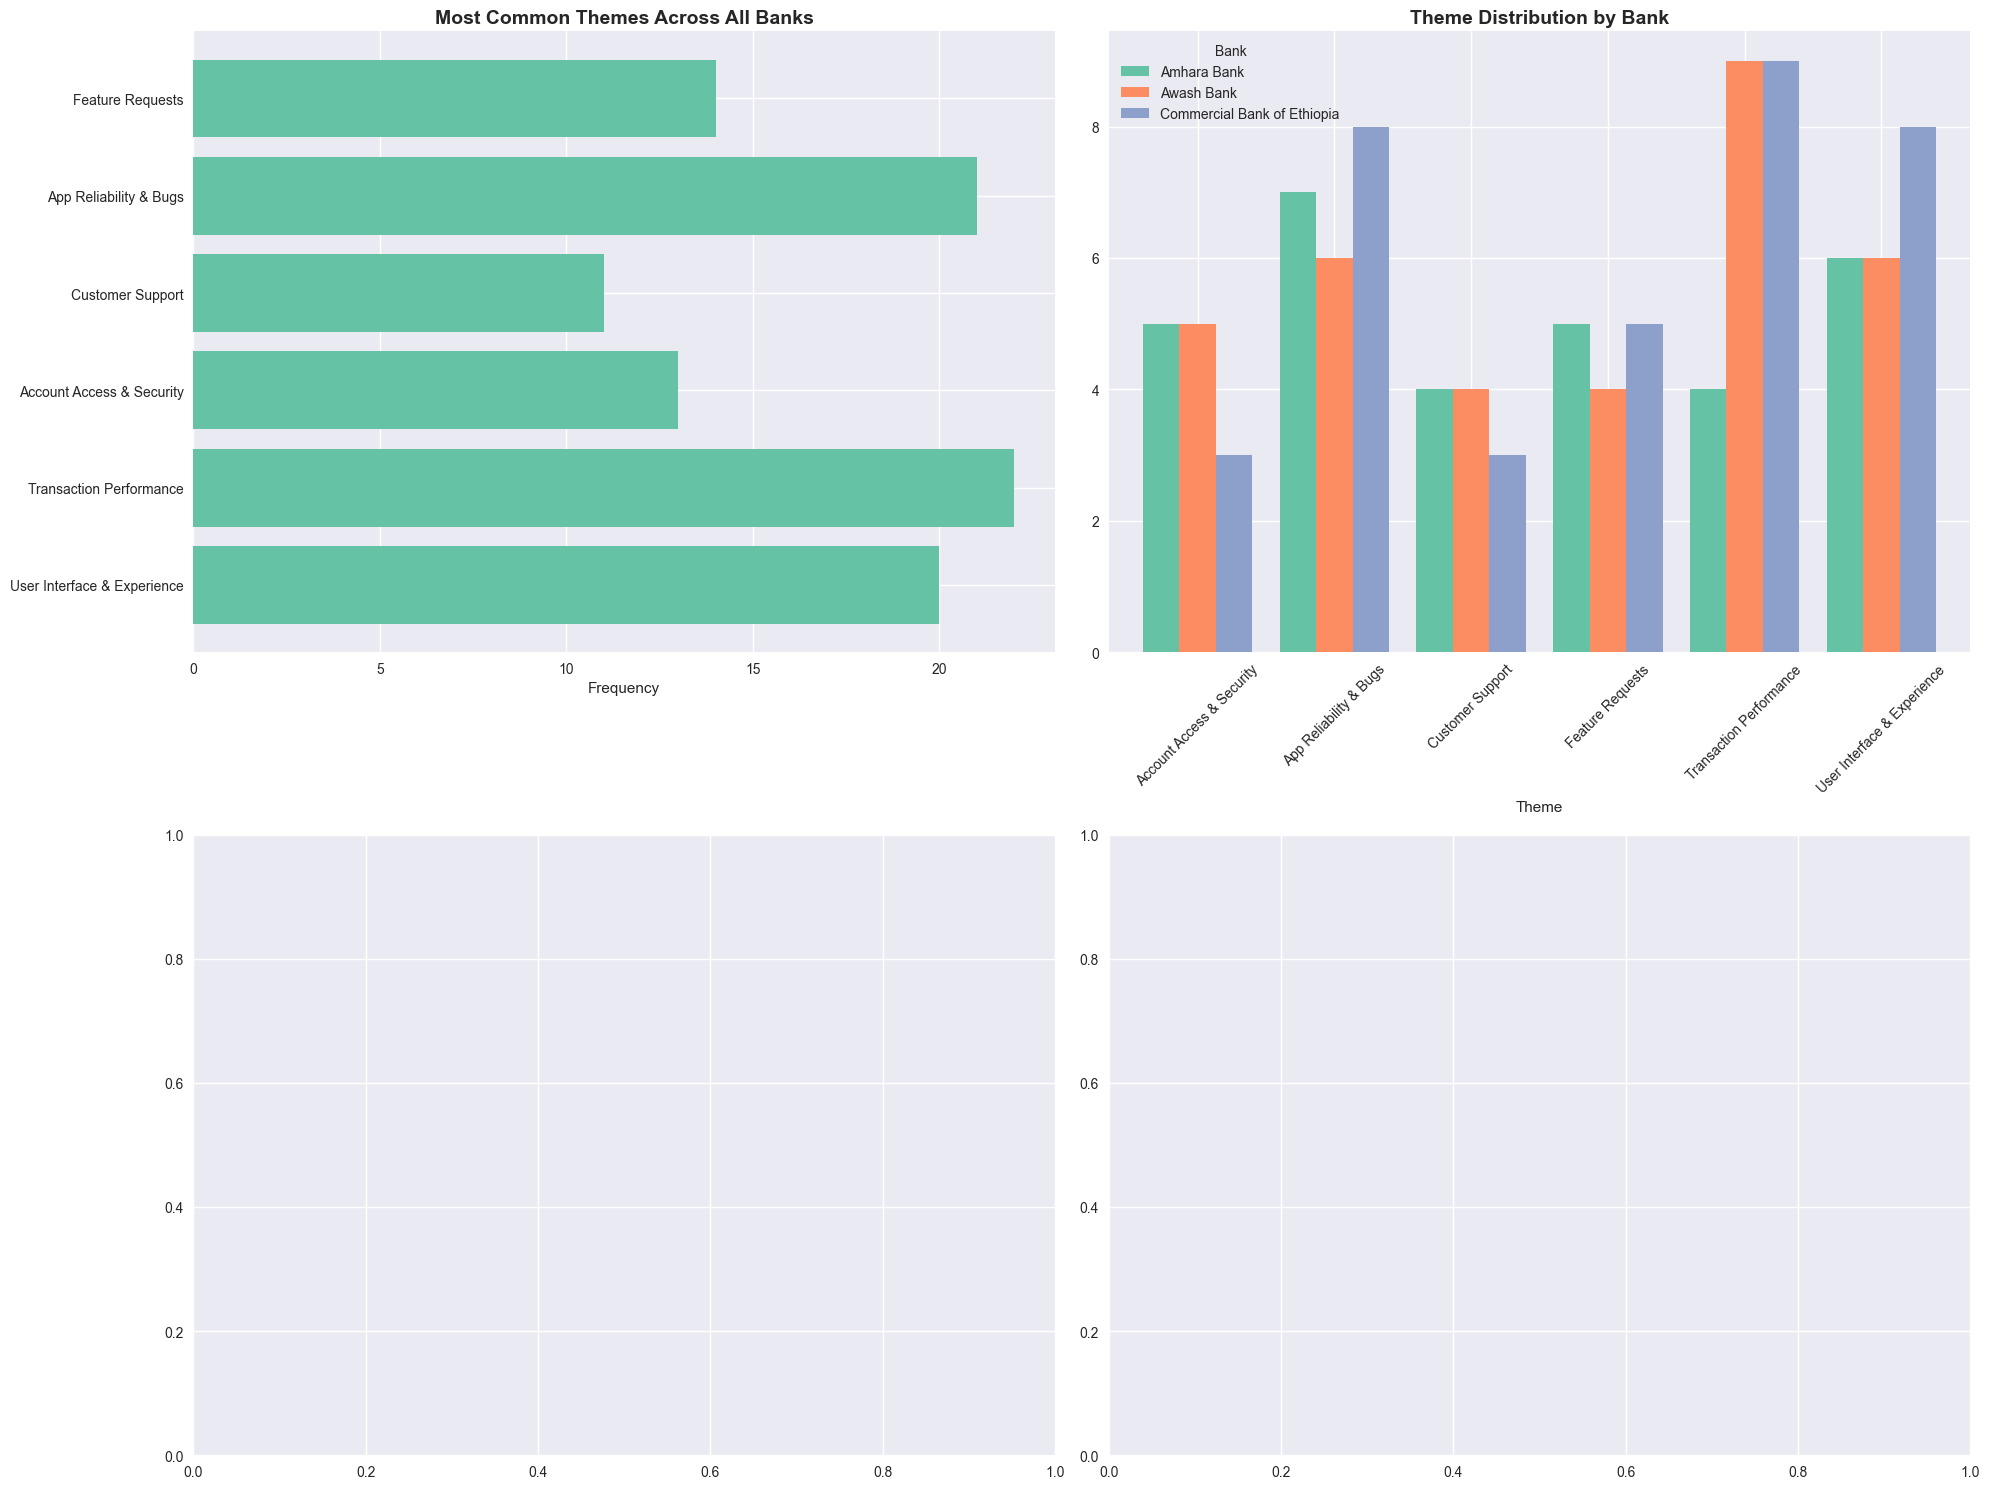

In [7]:
# 3. Visualize Theme Distribution
print("\n3. Visualizing Theme Distribution...")

# Create theme overview dashboard
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Theme frequency across all banks
all_themes = []
for bank, analysis in bank_themes.items():
    themes = analysis.get('themes_identified', {})
    for theme, keywords in themes.items():
    
        all_themes.extend([theme] * len(keywords))

theme_counts = Counter(all_themes)
axes[0,0].barh(list(theme_counts.keys())[:10], list(theme_counts.values())[:10])
axes[0,0].set_title('Most Common Themes Across All Banks', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Frequency')

# Themes by bank
bank_theme_data = []
for bank, analysis in bank_themes.items():
    themes = analysis.get('themes_identified', {})
    for theme in themes:
        bank_theme_data.append({'Bank': bank, 'Theme': theme, 'Count': len(themes[theme])})
        bank_theme_df = pd.DataFrame(bank_theme_data)
theme_pivot = bank_theme_df.pivot_table(index='Theme', columns='Bank', values='Count', fill_value=0)

theme_pivot.plot(kind='bar', ax=axes[0,1], width=0.8)
axes[0,1].set_title('Theme Distribution by Bank', fontsize=14, fontweight='bold')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].legend(title='Bank')

# Sentiment-based themes
positive_themes_all = []
negative_themes_all = []

for bank, evolution in theme_evolution.items():
    pos_themes = evolution['positive'].get('themes_identified', {})
    neg_themes = evolution['negative'].get('themes_identified', {})
    for theme in pos_themes:
        positive_themes_all.extend([theme] * len(pos_themes[theme]))
    for theme in neg_themes:
        negative_themes_all.extend([theme] * len(neg_themes[theme]))

pos_theme_counts = Counter(positive_themes_all)
neg_theme_counts = Counter(negative_themes_all)

# Top positive themes
if pos_theme_counts:
    axes[1,0].barh(list(pos_theme_counts.keys())[:8], list(pos_theme_counts.values())[:8], color='green')
    axes[1,0].set_title('Top Themes in Positive Reviews', fontsize=14, fontweight='bold')
    axes[1,0].set_xlabel('Frequency')
# Top negative themes
if neg_theme_counts:
    axes[1,1].barh(list(neg_theme_counts.keys())[:8], list(neg_theme_counts.values())[:8], color='red')
    axes[1,1].set_title('Top Themes in Negative Reviews', fontsize=14, fontweight='bold')
    axes[1,1].set_xlabel('Frequency')

plt.tight_layout()
plt.show()

    


4. Generating Word Clouds...


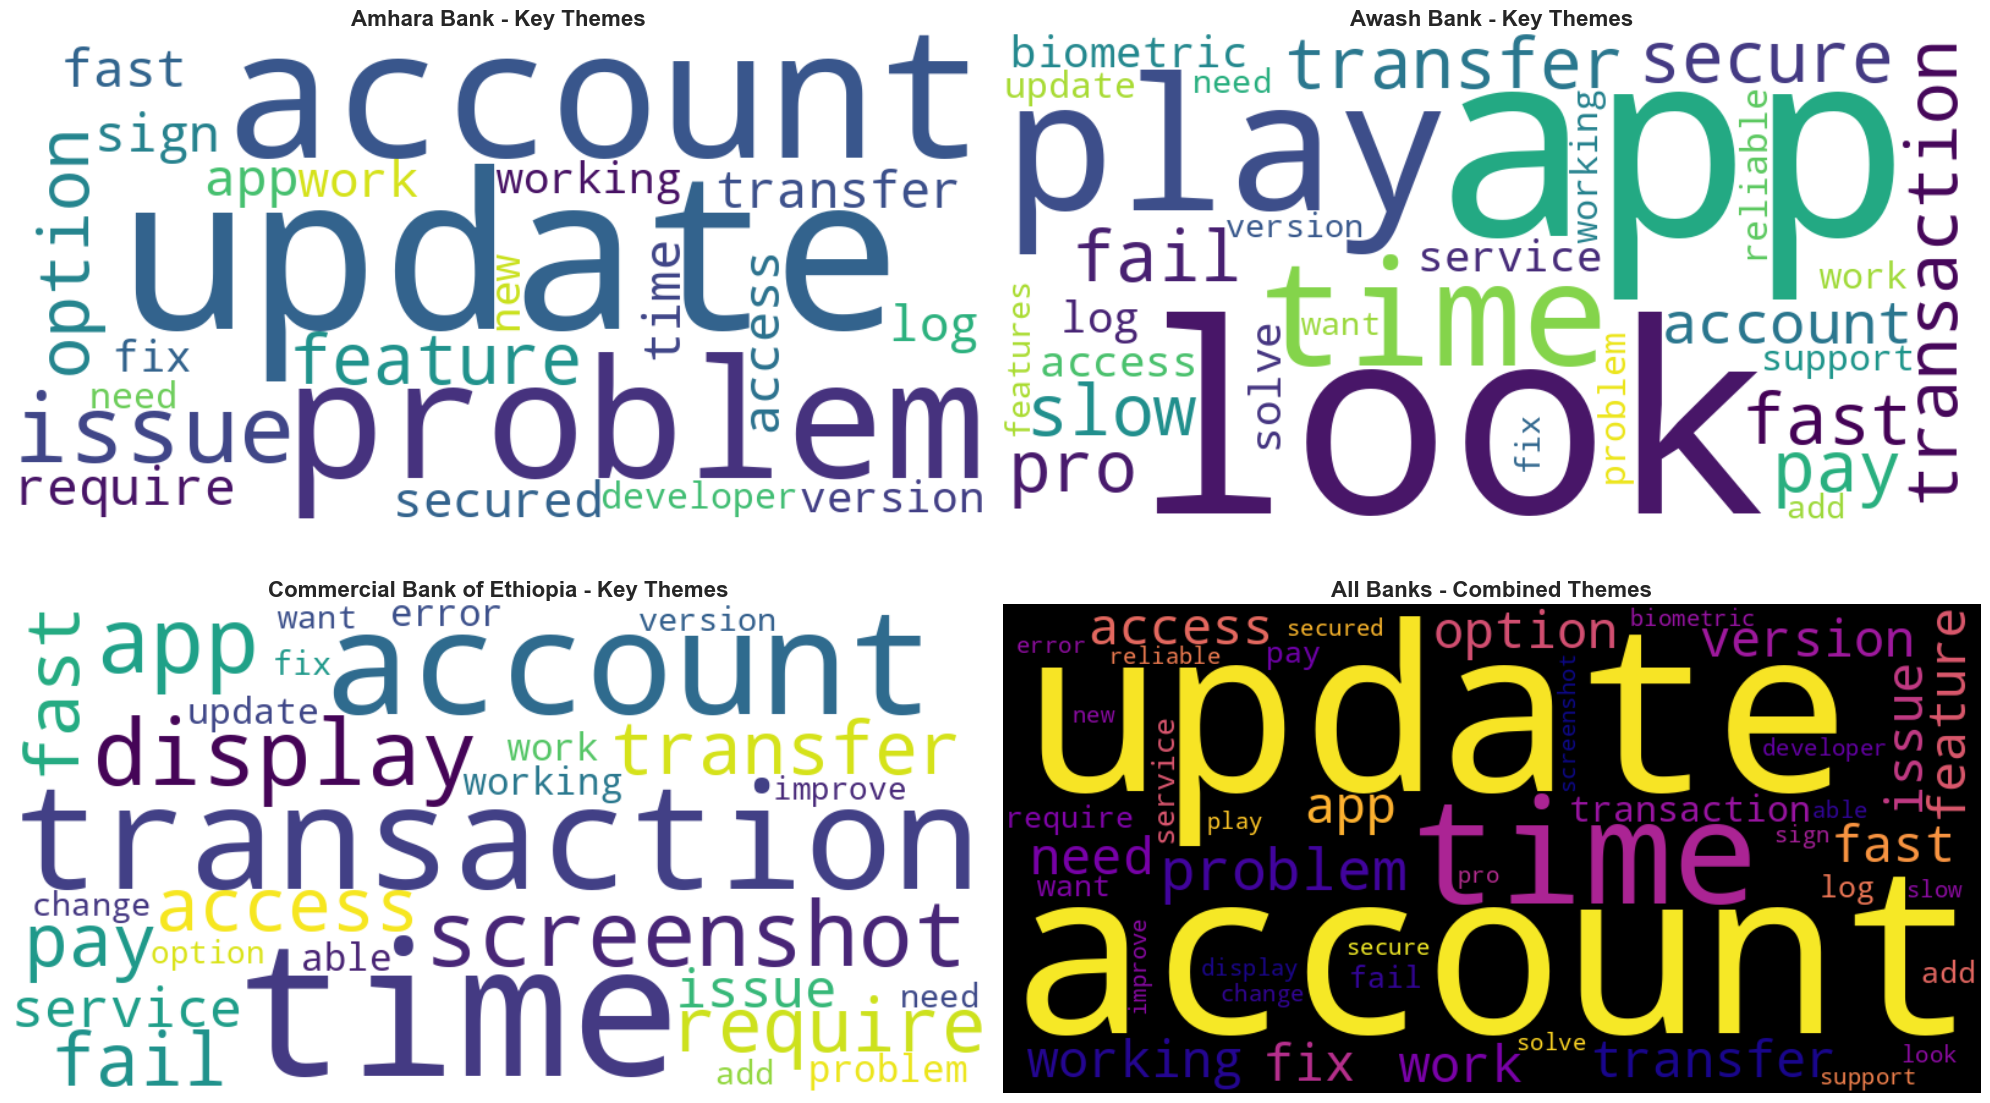

In [10]:
# 4. Word Clouds for Each Bank
print("\n4. Generating Word Clouds...")

fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.flatten()

for i, (bank, analysis) in enumerate(bank_themes.items()):
    if i >= 4: 
        break
        
    # Combine all keywords for the bank
    all_keywords = []
    themes = analysis.get('themes_identified', {})
    for theme_keywords in themes.values():
        all_keywords.extend(theme_keywords)
    
    if all_keywords:
        wordcloud = WordCloud(
            width=800, height=400, 
            background_color='white',
            colormap='viridis',
            max_words=50
        ).generate(' '.join(all_keywords))
        
        axes[i].imshow(wordcloud, interpolation='bilinear')
        axes[i].set_title(f'{bank} - Key Themes', fontsize=16, fontweight='bold')
        axes[i].axis('off')

# Add overall word cloud
all_keywords_all_banks = []
for analysis in bank_themes.values():
    themes = analysis.get('themes_identified', {})
    for theme_keywords in themes.values():
        all_keywords_all_banks.extend(theme_keywords)

if all_keywords_all_banks:
    wordcloud = WordCloud(
        width=800, height=400,
        background_color='black',
        colormap='plasma',
        max_words=50
    ).generate(' '.join(all_keywords_all_banks))
    
    if len(bank_themes) < 4:
        axes[len(bank_themes)].imshow(wordcloud, interpolation='bilinear')
        axes[len(bank_themes)].set_title('All Banks - Combined Themes', fontsize=16, fontweight='bold')
        axes[len(bank_themes)].axis('off')

plt.tight_layout()
plt.show()


In [11]:
# 5. Detailed Theme Analysis per Bank
print("\n5. Generating Detailed Bank-Level Analysis...")

for bank, analysis in bank_themes.items():
    print(f"\n🏦 {bank.upper()} - THEMATIC ANALYSIS")
    print("=" * 50)
    
    themes = analysis.get('themes_identified', {})
    total_themes = len(themes)
    total_keywords = sum(len(keywords) for keywords in themes.values())
    
    print(f"Total Themes Identified: {total_themes}")
    print(f"Total Keywords Extracted: {total_keywords}")
    print(f"Reviews Analyzed: {analysis.get('total_reviews_analyzed', 0)}")
    
    # Display top themes with examples
    for theme, keywords in themes.items():
        print(f"\n📊 {theme}:")
        print(f"   Keywords: {', '.join(keywords[:5])}{'...' if len(keywords) > 5 else ''}")
        
        # Show example reviews
        examples = analysis.get('theme_examples', {}).get(theme, [])
        if examples:
            print(f"   Example Reviews:")
            for i, example in enumerate(examples[:2]):  # Show 2 examples
                sentiment_emoji = "😊" if example['sentiment'] == 'positive' else "😞" if example['sentiment'] == 'negative' else "😐"
                print(f"     {i+1}. {sentiment_emoji} Rating {example['rating']}: {example['review_text'][:100]}...")



5. Generating Detailed Bank-Level Analysis...

🏦 AMHARA BANK - THEMATIC ANALYSIS
Total Themes Identified: 6
Total Keywords Extracted: 31
Reviews Analyzed: 100

📊 User Interface & Experience:
   Keywords: i, you, sign, app, require...
   Example Reviews:
     1. 😐 Rating 5: Very Useful and attractive app !...
     2. 😐 Rating 5: Easy to use without need to authorization...

📊 Transaction Performance:
   Keywords: fast, transfer, time, it
   Example Reviews:
     1. 😐 Rating 5: Easy to use without need to authorization...
     2. 😐 Rating 5: One of best mobile application i have ever used .... so keep it as close friendly as you can guys 💪...

📊 Account Access & Security:
   Keywords: account, my account, access, secured, log
   Example Reviews:
     1. 😐 Rating 5: Very comfortable and include more features of the bank products that special from others. I recommen...
     2. 😐 Rating 5: This is the best app and easy to use! When we came to the security issue, untill now I found this ap.

In [13]:
# 6. Sentiment-Theme Correlation Analysis
print("\n6. Analyzing Sentiment-Theme Correlations...")

# Create sentiment-theme matrix
theme_sentiment_data = []

for bank, analysis in bank_themes.items():
    themes = analysis.get('themes_identified', {})
    theme_examples = analysis.get('theme_examples', {})
    
    for theme, examples in theme_examples.items():
        if examples:
            avg_rating = np.mean([ex['rating'] for ex in examples])
            sentiment_dist = Counter([ex['sentiment'] for ex in examples])
            total_examples = len(examples)
            
            theme_sentiment_data.append({
                'Bank': bank,
                'Theme': theme,
                'Avg_Rating': avg_rating,
                'Positive_Examples': sentiment_dist.get('positive', 0),
                'Negative_Examples': sentiment_dist.get('negative', 0),
                'Total_Examples': total_examples
            })

if theme_sentiment_data:
    theme_sentiment_df = pd.DataFrame(theme_sentiment_data)
    # Create interactive visualization
    fig = px.scatter(theme_sentiment_df, 
                     x='Avg_Rating', 
                     y='Total_Examples',
                     size='Positive_Examples',
                     color='Bank',
                     hover_data=['Theme', 'Negative_Examples'],
                     title='Theme Analysis: Rating vs Frequency by Bank',
                     size_max=30)
    
    fig.update_layout(height=600)
    fig.show()



6. Analyzing Sentiment-Theme Correlations...


In [14]:
# 7. Actionable Insights Generation
print("\n7. Generating Actionable Insights...")

print("\n🎯 ACTIONABLE INSIGHTS FOR BANKS:")
print("=" * 50)

for bank, analysis in bank_themes.items():
    print(f"\n💡 RECOMMENDATIONS FOR {bank.upper()}:")
    
    themes = analysis.get('themes_identified', {})
    theme_examples = analysis.get('theme_examples', {})
       # Priority themes (based on frequency and sentiment)
    priority_themes = []
    for theme, examples in theme_examples.items():
        if examples:
            negative_count = sum(1 for ex in examples if ex['sentiment'] == 'negative')
            if negative_count > 0:  # Focus on pain points
                priority_themes.append((theme, negative_count, len(examples)))
    
    # Sort by negative impact
    priority_themes.sort(key=lambda x: x[1]/x[2] if x[2] > 0 else 0, reverse=True)
    
    for theme, neg_count, total_count in priority_themes[:3]:  # Top 3 pain points
        neg_percentage = (neg_count / total_count) * 100
        print(f"   🚨 {theme}:")
        print(f"      • {neg_percentage:.1f}% of mentions are negative")
        print(f"      • Total mentions: {total_count}")
        
        # Generate specific recommendation
        if 'login' in theme.lower() or 'access' in theme.lower():
            print(f"      • Recommendation: Improve authentication flow, add biometric options")
        elif 'transaction' in theme.lower() or 'transfer' in theme.lower():
            print(f"      • Recommendation: Optimize processing speed, add transaction status tracking")
        elif 'ui' in theme.lower() or 'interface' in theme.lower():
            print(f"      • Recommendation: Redesign for better usability, conduct user testing")
        elif 'support' in theme.lower():
            print(f"      • Recommendation: Enhance in-app support, reduce response times")
        elif 'crash' in theme.lower() or 'bug' in theme.lower():
            print(f"      • Recommendation: Prioritize stability fixes, improve error handling")
    


7. Generating Actionable Insights...

🎯 ACTIONABLE INSIGHTS FOR BANKS:

💡 RECOMMENDATIONS FOR AMHARA BANK:

💡 RECOMMENDATIONS FOR AWASH BANK:

💡 RECOMMENDATIONS FOR COMMERCIAL BANK OF ETHIOPIA:



8. Performing Comparative Analysis Across Banks...


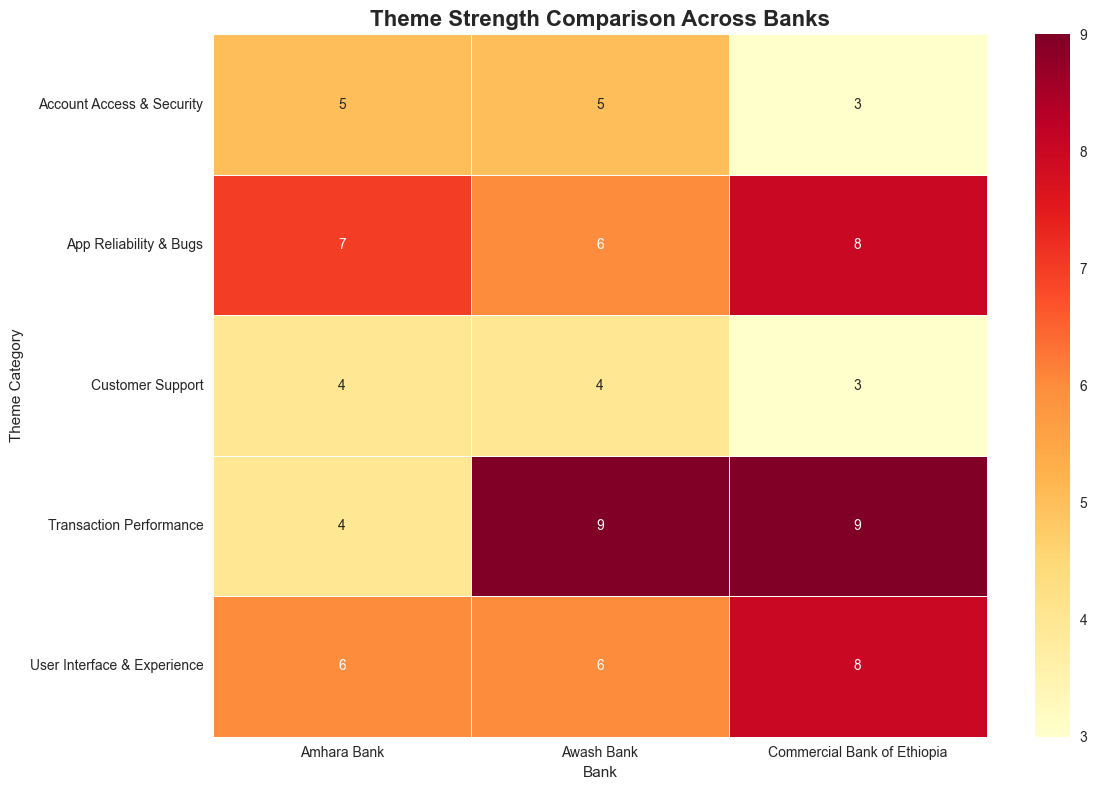

In [15]:
# 8. Comparative Analysis
print("\n8. Performing Comparative Analysis Across Banks...")

# Create comparison matrix
comparison_data = []
for bank, analysis in bank_themes.items():
    themes = analysis.get('themes_identified', {})
    
    for theme_category in ['User Interface & Experience', 'Transaction Performance', 
                          'Account Access & Security', 'Customer Support', 'App Reliability & Bugs']:
        theme_strength = len(themes.get(theme_category, []))
        comparison_data.append({
            'Bank': bank,
            'Theme Category': theme_category,
            'Strength': theme_strength
        })

comparison_df = pd.DataFrame(comparison_data)

# Create heatmap
pivot_df = comparison_df.pivot(index='Theme Category', columns='Bank', values='Strength')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap='YlOrRd', fmt='d', linewidths=0.5)
plt.title('Theme Strength Comparison Across Banks', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [17]:
# 9. Save Comprehensive Results
print("\n9. Saving Comprehensive Analysis Results...")

import json

# Save thematic analysis results
with open(r"C:\Users\admin\sentiment-analysis-week2\data\results\sentiment_metrics_detailed.json", 'w') as f:
    comprehensive_results = {
        'bank_themes': bank_themes,
        'theme_evolution': theme_evolution,
        'summary_metrics': {
            'total_themes_identified': sum(
                len(analysis.get('themes_identified', {})) 
                for analysis in bank_themes.values()
            ),
            'banks_analyzed': list(bank_themes.keys()),
            'analysis_timestamp': pd.Timestamp.now().isoformat()
        }
    }
    json.dump(comprehensive_results, f, indent=2)

# Save actionable insights
insights_report = {
    'generated_date': pd.Timestamp.now().isoformat(),
    'banks_analyzed': list(bank_themes.keys()),
    'key_findings': {},
    'recommendations': {}
}

for bank, analysis in bank_themes.items():
    themes = analysis.get('themes_identified', {})
    insights_report['key_findings'][bank] = {
        'primary_themes': list(themes.keys()),
        'theme_count': len(themes),
        'total_keywords': sum(len(keywords) for keywords in themes.values())
    }
    
    # Generate recommendations
    priority_areas = []
    for theme in themes:
        if any(word in theme.lower() for word in ['login', 'error', 'crash', 'slow', 'bug']):
            priority_areas.append(theme)
    
    insights_report['recommendations'][bank] = {
        'priority_areas': priority_areas[:3],
        'strengths': [theme for theme in themes if 'good' in theme.lower() or 'easy' in theme.lower()][:2],
        'improvement_opportunities': priority_areas[:3]
    }

# Save actionable insights report
with open(r"C:\Users\admin\sentiment-analysis-week2\data\results\actionable_insights_report.json", 'w') as f:
    json.dump(insights_report, f, indent=2)

print("✓ Thematic analysis results saved")
print("✓ Actionable insights report generated")
print("✓ Comprehensive metrics exported")



9. Saving Comprehensive Analysis Results...
✓ Thematic analysis results saved
✓ Actionable insights report generated
✓ Comprehensive metrics exported


In [18]:
# 10. Final Summary
print("\n🎉 THEMATIC ANALYSIS COMPLETED SUCCESSFULLY!")

print(f"\n📊 FINAL SUMMARY:")
print(f"   • Banks Analyzed: {len(bank_themes)}")
print(f"   • Total Themes Identified: {sum(len(analysis.get('themes_identified', {})) for analysis in bank_themes.values())}")
print(f"   • Average Themes per Bank: {np.mean([len(analysis.get('themes_identified', {})) for analysis in bank_themes.values()]):.1f}")
print(f"   • Key Analysis Methods: TF-IDF, spaCy NLP, Manual Theme Mapping")
print(f"   • Insight Generation: Sentiment-Theme correlation, Priority ranking")

print(f"\n🔍 KEY DISCOVERIES:")
for bank, analysis in bank_themes.items():
    themes = analysis.get('themes_identified', {})
    top_themes = list(themes.keys())[:3]
    print(f"   • {bank}: {', '.join(top_themes)}")

print(f"\n📈 NEXT STEPS:")
print(f"   • Review actionable insights report for bank-specific recommendations")
print(f"   • Examine theme-sentiment correlations for improvement priorities")
print(f"   • Use word clouds for quick visual understanding of key topics")


🎉 THEMATIC ANALYSIS COMPLETED SUCCESSFULLY!

📊 FINAL SUMMARY:
   • Banks Analyzed: 3
   • Total Themes Identified: 18
   • Average Themes per Bank: 6.0
   • Key Analysis Methods: TF-IDF, spaCy NLP, Manual Theme Mapping
   • Insight Generation: Sentiment-Theme correlation, Priority ranking

🔍 KEY DISCOVERIES:
   • Amhara Bank: User Interface & Experience, Transaction Performance, Account Access & Security
   • Awash Bank: User Interface & Experience, Transaction Performance, Account Access & Security
   • Commercial Bank of Ethiopia: User Interface & Experience, Transaction Performance, Account Access & Security

📈 NEXT STEPS:
   • Review actionable insights report for bank-specific recommendations
   • Examine theme-sentiment correlations for improvement priorities
   • Use word clouds for quick visual understanding of key topics
